# Basic API Usage for FFmpeg

## Input

### Creating a New Input Stream
To create a new input stream, use the `ffmpeg.input` function. This function is straightforward and initiates the stream from a specified file.


In [13]:
from ffmpeg.utils.view import view
from IPython.display import Image
from ffmpeg.dag.nodes import Stream
import os

media_path = "../media"

def _show(stream: Stream) -> Image:
    opath = view(stream.node, format="png")
    return Image(filename=opath)


In [1]:

import ffmpeg

# Create a new input stream
ffmpeg.input('input.mp4')


/workspaces/typed-ffmpeg/.venv/lib/python3.10/site-packages/IPython/core/formatters.py:370: FormatterWarning: image/png formatter returned invalid type <class 'IPython.core.display.Image'> (expected (<class 'bytes'>, <class 'str'>)) for object: AVStream(node=InputNode(kwargs=(), inputs=(), filename='input.mp4'), index=None)
  warnings.warn(


AVStream(node=InputNode(kwargs=(), inputs=(), filename='input.mp4'), index=None)

### Adding Input Options
To specify additional options for the input stream, such as start time and duration, you can include them directly in the `ffmpeg.input` function.


In [2]:
import ffmpeg

# Create a new input stream with specific options
input_stream = ffmpeg.input('input.mp4', ss=10, t=20)  # Start at 10 seconds and last for 20 seconds
_show(input_stream)

NameError: name '_show' is not defined


!!! note
    The `ss` option specifies the start time (in seconds), and the `t` option specifies the duration (in seconds) of the input stream. For more details, refer to the [FFmpeg documentation](https://ffmpeg.org/ffmpeg.html#Main-options).

## Output

### Creating a New Output Stream
To create a new output stream, use the `ffmpeg.output` function. This function is used to configure the output settings of the stream.


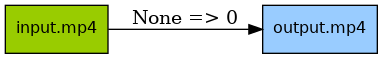

In [ ]:
import ffmpeg

# Create a new output stream
stream = ffmpeg.input("input.mp4").output(filename="output.mp4")
_show(stream)


### Specifying Output Options
You can specify various output options directly in the `ffmpeg.output` function, such as the start time and duration for the output file.

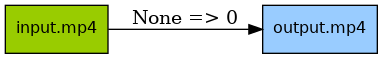

In [ ]:
import ffmpeg

# Create and configure a new output stream
stream = ffmpeg.input("input.mp4").output(filename="output.mp4", ss=10, t=20)  # Output starting at 10 seconds with a duration of 20 seconds
_show(stream)

You can also map multiple streams to a single output file.


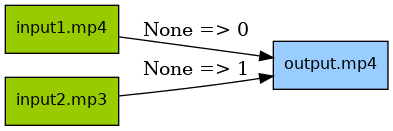

In [ ]:
import ffmpeg

# Define input streams
input1 = ffmpeg.input('input1.mp4')
input2 = ffmpeg.input('input2.mp3')

# Map multiple inputs to a single output
stream = ffmpeg.output(input1, input2, filename="output.mp4")
_show(stream)

Alternatively:


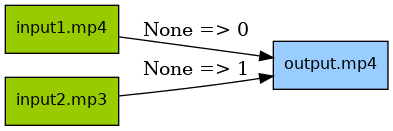

In [ ]:
import ffmpeg

# Chain input and output operations
stream = (
    ffmpeg.input('input1.mp4')
    .output(ffmpeg.input("input2.mp3"), filename="output.mp4")
)
_show(stream)


## Merging Outputs

FFmpeg allows processing multiple output files simultaneously. The Python FFmpeg wrapper supports this feature through the `merge_outputs` method.


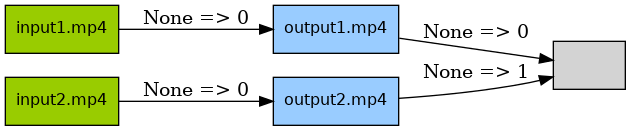

In [ ]:
import ffmpeg

# Define input streams
input1 = ffmpeg.input('input1.mp4')
input2 = ffmpeg.input('input2.mp4')

# Define output streams
output1 = input1.output(filename="output1.mp4")
output2 = input2.output(filename="output2.mp4")

# Merge the outputs into a single operation
stream = ffmpeg.merge_outputs(output1, output2)
_show(stream)